In [22]:
import numpy as np
import sympy as sp
from numba import njit

In [69]:
input = {}
input['vx'] = (np.random.random((1000,1000,1000))).reshape((-1,))
input['vy'] = (np.random.random((1000,1000,1000))).reshape((-1,))
input['vz'] = (np.random.random((1000,1000,1000))).reshape((-1,))



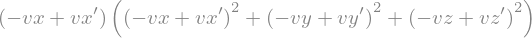

In [65]:
vxP, vxNP, vyP, vyNP, vzP, vzNP = sp.symbols(("vx'", "vx", "vy'", "vy", "vz'", "vz"))
expr_ps = ((vxP-vxNP)*(vxP-vxNP) + (vyP-vyNP)*(vyP-vyNP) + (vzP-vzNP)*(vzP-vzNP))*(vxP-vxNP)
expr_ps

In [9]:
vxP, vxNP, vyP, vyNP, vzP, vzNP = sp.symbols(('vxP', 'vxNP', 'vyP', 'vyNP', 'vzP', 'vzNP'))
expr_ps = ((vxP-vxNP)*(vxP-vxNP) + (vyP-vyNP)*(vyP-vyNP) + (vzP-vzNP)*(vzP-vzNP))*(vxP-vxNP)
fx = njit(sp.lambdify((vxP, vxNP, vyP, vyNP, vzP, vzNP),expr_ps,'numpy'))

@njit
def f(i,ip,vx,vy,vz,fx=fx):
    vxP = vx[ip]
    vxNP = vx[i]
    vyP = vy[ip]
    vyNP = vy[i]
    vzP = vz[ip]
    vzNP = vz[i]
    return fx(vxP, vxNP, vyP, vyNP, vzP, vzNP)

print(fx)
print(f)
    

CPUDispatcher(<function _lambdifygenerated at 0x7f1f95ed9dc0>)
CPUDispatcher(<function f at 0x7f1f95ed9d30>)


In [68]:
vxP, vxNP, vyP, vyNP, vzP, vzNP = sp.symbols(('vxP', 'vxNP', 'vyP', 'vyNP', 'vzP', 'vzNP'))
expr_ps = ((vxP-vxNP)*(vxP-vxNP) + (vyP-vyNP)*(vyP-vyNP) + (vzP-vzNP)*(vzP-vzNP))*(vxP-vxNP)
fx = njit(sp.lambdify((vxP, vxNP, vyP, vyNP, vzP, vzNP),expr_ps,'numpy'))

@njit
def f4(i,ip,vx,vy,vz,fx=fx):
    quantities = []
    quantities.append(vx[ip],vx[i],vy[ip],vy[i],vz[ip],vz[i])
    return fx(*quantities)

print(fx)

CPUDispatcher(<function _lambdifygenerated at 0x7f913e9825e0>)


In [65]:
class Term:
    def __init__(self):
        self.set_sympy_expr()
        self.fct = sp.lambdify( sp.symbols(('vxP', 'vxNP', 'vyP', 'vyNP', 'vzP', 'vzNP')),self.expr,'numpy')
    
    def set_sympy_expr(self):
        vxP, vxNP, vyP, vyNP, vzP, vzNP = sp.symbols(('vxP', 'vxNP', 'vyP', 'vyNP', 'vzP', 'vzNP'))
        A = (vxP-vxNP)*(vxP-vxNP)
        B = (vyP-vyNP)*(vyP-vyNP)
        C = (vzP-vzNP)*(vzP-vzNP)
        self.expr = (A + B+ C)*(vxP-vxNP)


#fy = njit(Term().fct)

@njit
def f3(i,ip,vx,vy,vz,fx=njit(Term().fct)):
    vxP = vx[ip]
    vxNP = vx[i]
    vyP = vy[ip]
    vyNP = vy[i]
    vzP = vz[ip]
    vzNP = vz[i]
    return fx(vxP, vxNP, vyP, vyNP, vzP, vzNP)

def print_expr():
    sp.init_printing(use_latex=True)
    return Term().expr

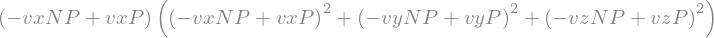

In [66]:
print_expr()

In [53]:
@njit
def f2(i,ip,vx,vy,vz):
    vxP = vx[ip]
    vxNP = vx[i]
    vyP = vy[ip]
    vyNP = vy[i]
    vzP = vz[ip]
    vzNP = vz[i]
    return ((vxP-vxNP)*(vxP-vxNP) + (vyP-vyNP)*(vyP-vyNP) + (vzP-vzNP)*(vzP-vzNP))*(vxP-vxNP) 

In [5]:
@njit
def test_f4(l,dist:int, f, *quantities):
    acc = 0
    for i in range(l - dist):
        acc +=  f(i,i+dist, *quantities) 
    offset = l-dist
    for i in range(dist):
        acc +=   f(i+offset, i, *quantities)
    return acc

In [10]:
print(test_f4(len(input['vx']),int(10), f, input['vx'],input['vy'],input['vz']))
%timeit test_f4(len(input['vx']),int(10), f, input['vx'],input['vy'],input['vz'])

-4811.571639457486
2.24 s ± 67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
print(test_f4(len(input['vx']),int(10), f2, input['vx'],input['vy'],input['vz']))
%timeit test_f4(len(input['vx']),int(10), f2, input['vx'],input['vy'],input['vz'])

6554.442663145018
2.29 s ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
print(test_f4(len(input['vx']),int(10), f3, input['vx'],input['vy'],input['vz']))
%timeit test_f4(len(input['vx']),int(10), f3, input['vx'],input['vy'],input['vz'])

-8773.068743713106
2.22 s ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
print(test_f4(len(input['vx']),int(10), f4, input['vx'],input['vy'],input['vz']))
%timeit test_f4(len(input['vx']),int(10), f4, input['vx'],input['vy'],input['vz'])

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1m- Resolution failure for literal arguments:
[1mtoo many values to unpack (expected 1)[0m
[0m[1m- Resolution failure for non-literal arguments:
[1mNone[0m
[0m[0m
[0m[1mDuring: resolving callee type: BoundFunction(list.append for list(undefined)<iv=None>)[0m
[0m[1mDuring: typing of call at /tmp/ipykernel_53174/2112971277.py (8)
[0m
[1m
File "../../../../../../tmp/ipykernel_53174/2112971277.py", line 8:[0m
[1m<source missing, REPL/exec in use?>[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function f4 at 0x7f913e793c10>))[0m
[0m[1mDuring: typing of call at /tmp/ipykernel_53174/104631631.py (5)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function f4 at 0x7f913e793c10>))[0m
[0m[1mDuring: typing of call at /tmp/ipykernel_53174/104631631.py (8)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function f4 at 0x7f913e793c10>))[0m
[0m[1mDuring: typing of call at /tmp/ipykernel_53174/104631631.py (5)
[0m
[1m
File "../../../../../../tmp/ipykernel_53174/104631631.py", line 5:[0m
[1m<source missing, REPL/exec in use?>[0m
